In [ ]:
BREAST CANCER PREDICTION

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from IPython.display import Image

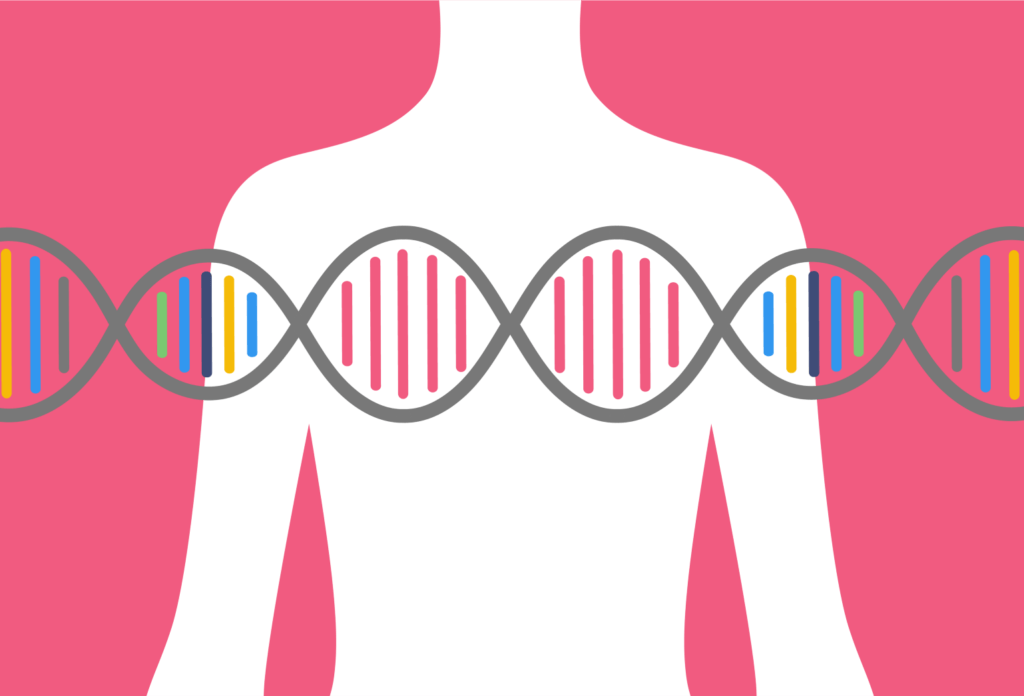

In [160]:
Image(filename='C:/Users/SOURAV/Desktop/python/Breast Cancer Project/brca--1024x696.png',width=800,height=200)

In [58]:
df=pd.read_csv('C:/Users/SOURAV/Desktop/python/Breast Cancer Project/breast-cancer.csv')

In [59]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [60]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [61]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [63]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [64]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


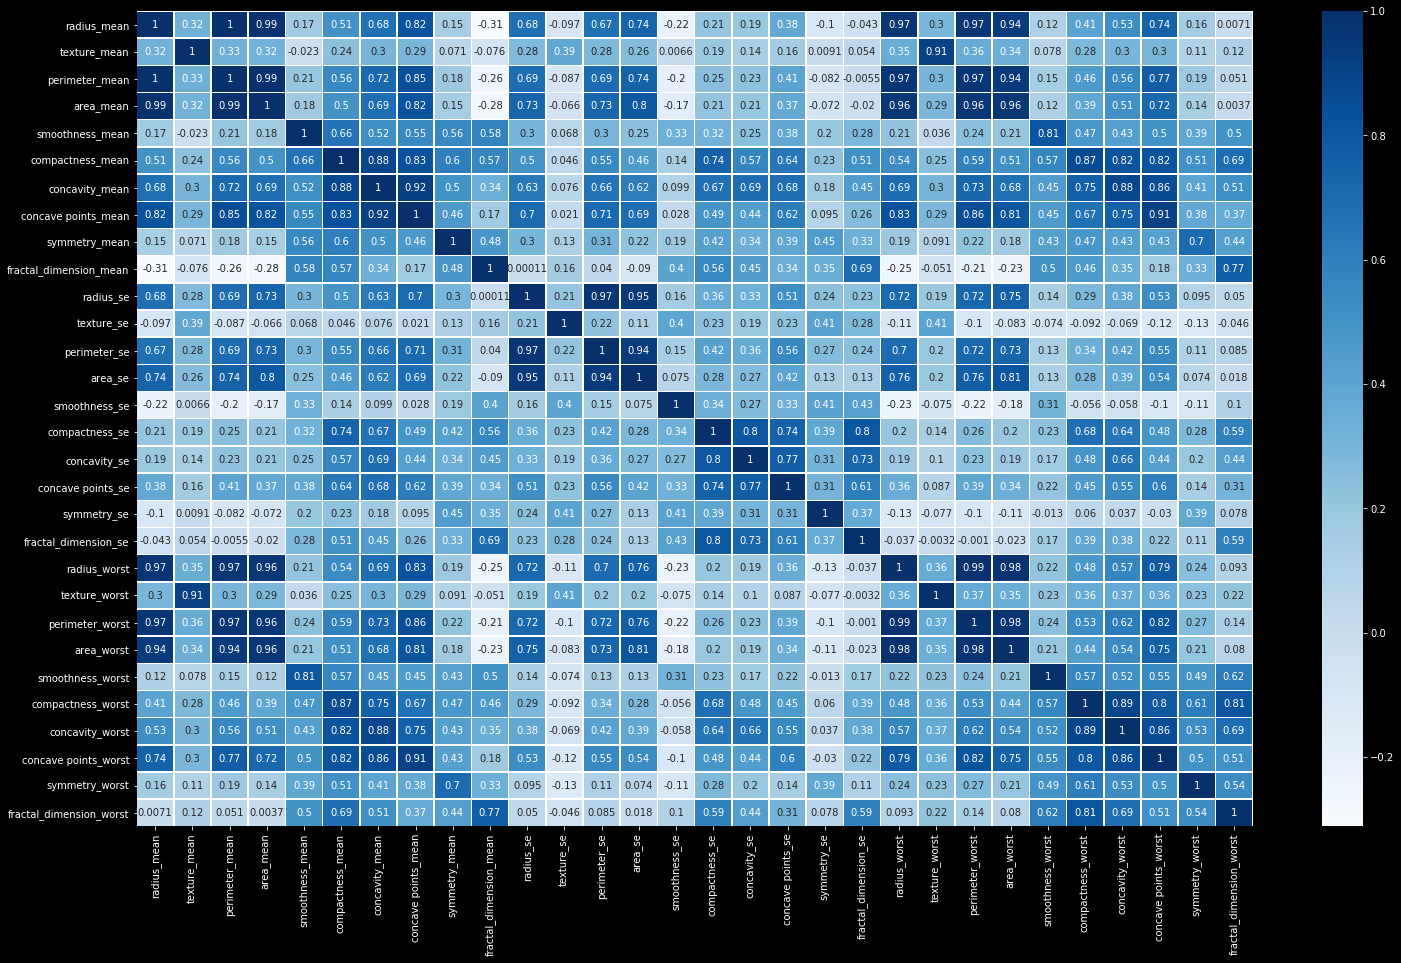

In [65]:
plt.figure(figsize=(25,15))
sb.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB6FAD3208>]],
      dtype=object)

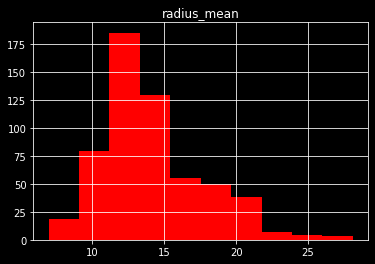

In [66]:
df.hist('radius_mean',color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB6E36CEC8>]],
      dtype=object)

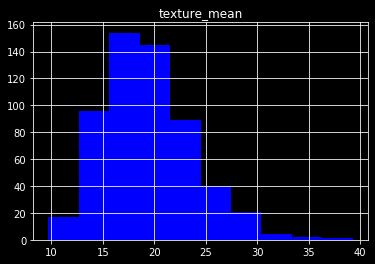

In [67]:
df.hist('texture_mean',color='blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB6E437488>]],
      dtype=object)

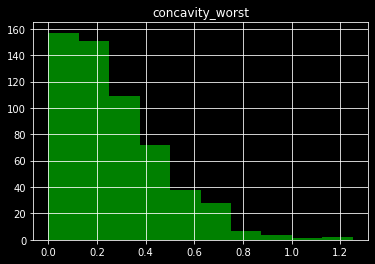

In [68]:
df.hist('concavity_worst',color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB6E646848>]],
      dtype=object)

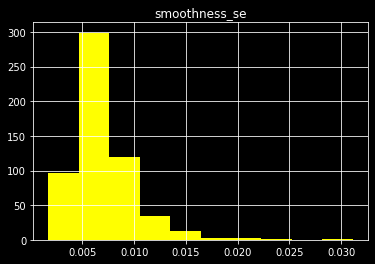

In [69]:
df.hist('smoothness_se',color='yellow')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB6E4C79C8>,
      dtype=object)

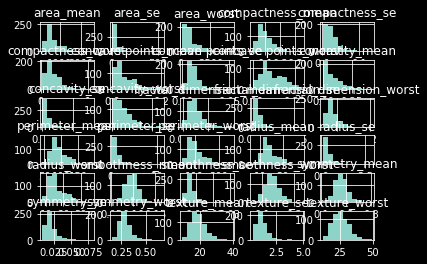

In [70]:
df.hist()

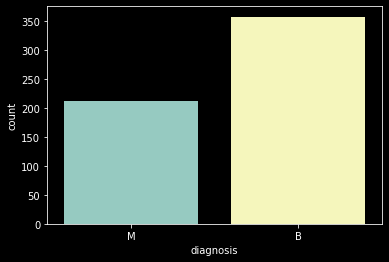

In [71]:
sb.countplot(x='diagnosis',data=df)

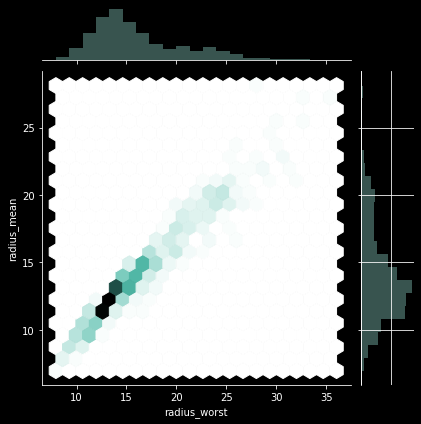

In [72]:
sb.jointplot(y='radius_mean',x='radius_worst',data=df,kind='hex')
plt.grid()

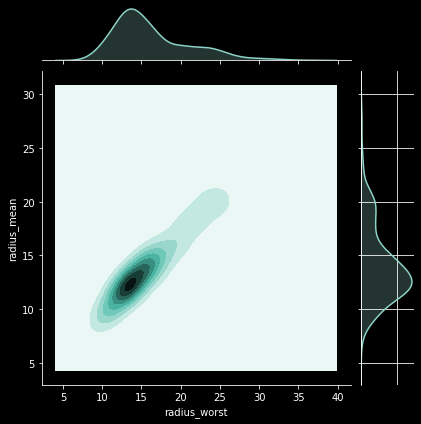

In [73]:

sb.jointplot(y='radius_mean',x='radius_worst',data=df,kind='kde')
plt.grid()

In [74]:
scaler=StandardScaler()

In [75]:
coulumn_to_scale=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

In [76]:
df[coulumn_to_scale]=scaler.fit_transform(df[coulumn_to_scale])

In [77]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [78]:
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [79]:
x
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [80]:
knn=KNeighborsClassifier(n_neighbors=10)

In [119]:
score=cross_val_score(knn,x,y,cv=10)
score

array([0.98245614, 0.94736842, 0.9122807 , 0.98245614, 0.98245614,
       0.96491228, 0.92982456, 0.98245614, 0.98245614, 0.98214286])

In [82]:
score.mean()#ACCURACY SCORE

0.9648809523809524

In [83]:
knn=[]
for i in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn.append(score.mean())

Text(0.5, 1.0, 'BREAST CANCER PREDICTION USING KNN ALGORITHM')

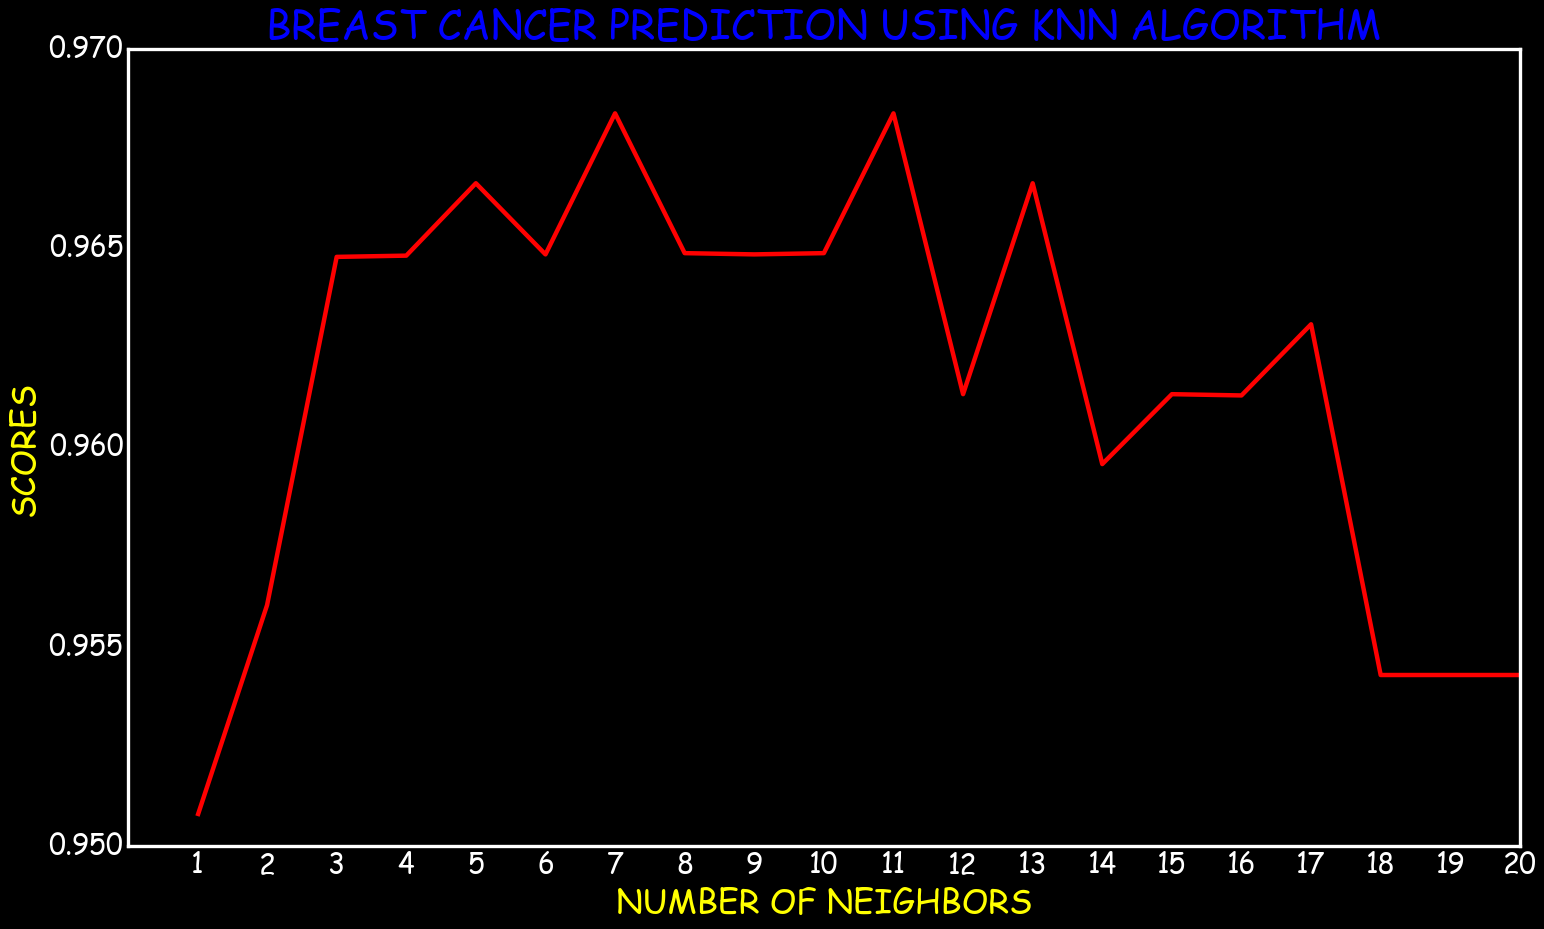

In [104]:
plt.style.use('dark_background')
matplotlib.rcParams['font.size']=25
matplotlib.rcParams['font.family']='fantasy'
plt.figure(figsize=(20,12))
plt.plot([k for k in range(1,21)],knn,color='red')
plt.xticks([i for i in range(1,21)])
plt.grid()
plt.xlabel('NUMBER OF NEIGHBORS',color='yellow')
plt.ylabel('SCORES',color='yellow')
plt.title('BREAST CANCER PREDICTION USING KNN ALGORITHM',color='blue')

In [88]:
print(matplotlib.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [120]:
knn=KNeighborsClassifier(n_neighbors=10)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=4)
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [121]:
y_pred=knn.predict(test_x)

In [122]:
y_pred

array(['B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [123]:
np.array(test_y)

array(['B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [124]:
accuracy_score(test_y,y_pred)

0.9824561403508771

In [126]:
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[80  0]
 [ 2 32]]
              precision    recall  f1-score   support

           B       0.98      1.00      0.99        80
           M       1.00      0.94      0.97        34

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [128]:
random=RandomForestClassifier(n_estimators=10)

In [133]:
score=cross_val_score(random,x,y,cv=10)
score

array([0.98245614, 0.9122807 , 0.92982456, 0.92982456, 0.98245614,
       0.98245614, 0.98245614, 0.98245614, 0.94736842, 0.94642857])

In [134]:
score.mean()#ACCURACY SCORE FOR RANDOMFOREST ALGORITHM

0.9578007518796993

In [136]:
random=[]
for i in range(1,21):
    random_classifier=RandomForestClassifier(n_estimators=i)
    score=cross_val_score(random_classifier,x,y,cv=10)
    random.append(score.mean())

Text(0.5, 1.0, 'BREAST CANCER PREDICTION USING RANDOM FOREST ALGORITHM')

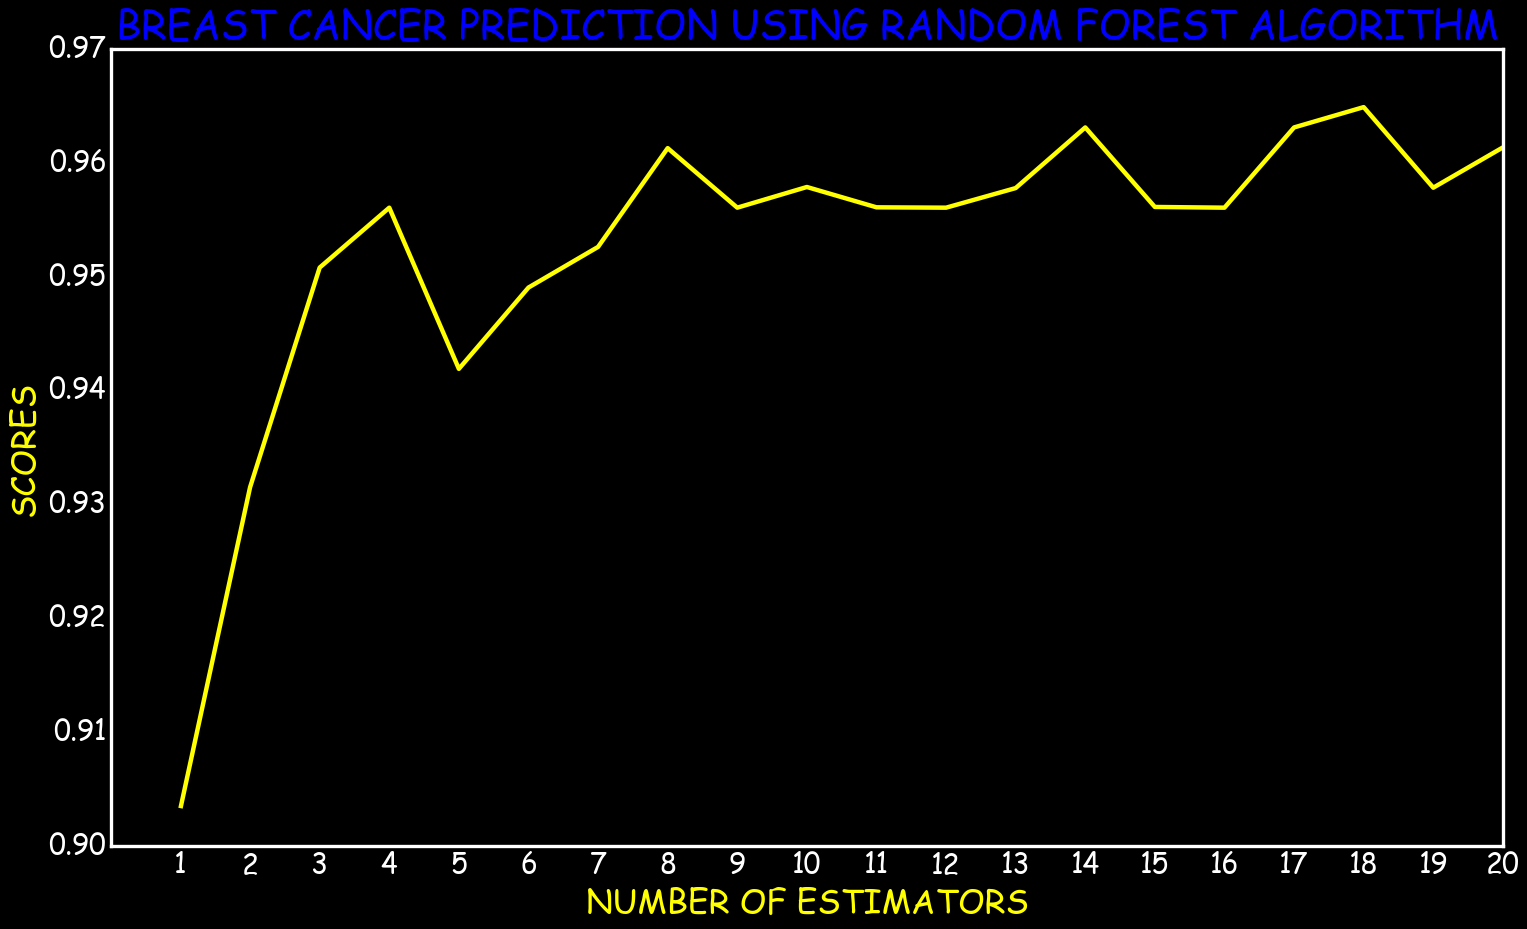

In [140]:
plt.style.use('dark_background')
matplotlib.rcParams['font.size']=25
matplotlib.rcParams['font.family']='fantasy'
plt.figure(figsize=(20,12))
plt.plot([k for k in range(1,21)],random,color='yellow')
plt.xticks([i for i in range(1,21)])
plt.grid()
plt.xlabel('NUMBER OF ESTIMATORS',color='yellow')
plt.ylabel('SCORES',color='yellow')
plt.title('BREAST CANCER PREDICTION USING RANDOM FOREST ALGORITHM',color='blue')

In [144]:
random=RandomForestClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=4)
random.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
y_pred=random.predict(test_x)
y_pred

array(['M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [149]:
np.array(test_y)

array(['B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [150]:
accuracy_score(test_y,y_pred)

0.9210526315789473

In [151]:
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[72  8]
 [ 1 33]]
              precision    recall  f1-score   support

           B       0.99      0.90      0.94        80
           M       0.80      0.97      0.88        34

    accuracy                           0.92       114
   macro avg       0.90      0.94      0.91       114
weighted avg       0.93      0.92      0.92       114



In [153]:
cm=pd.DataFrame(confusion_matrix(test_y,y_pred))

In [154]:
cm

,0,1
0,72,8
1,1,33


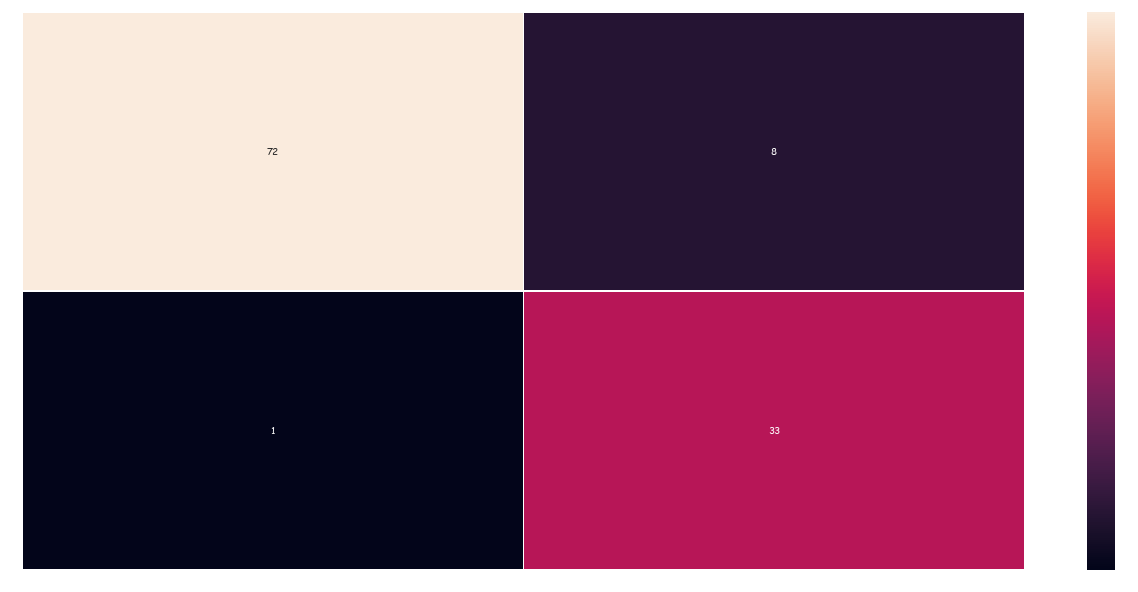

In [158]:
plt.figure(figsize=(20,10))
sb.heatmap(cm,annot=True,linewidth=0.6)

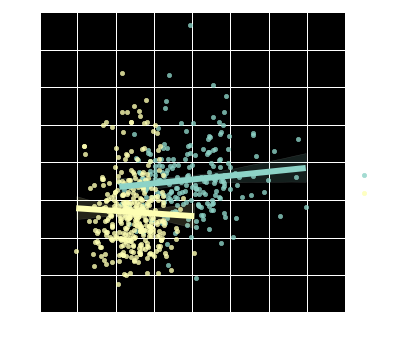

In [159]:
sb.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)